## Imports 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os

from Function import QuadraticFunction
from plot import plot_cost_gradient_norm, plot_cost_quadratic
from utils import gradient_tracking, generate_adj_matrix, get_average_consensus_error
from configuration import setup_quadratic_problem

## Parameters

In [2]:
SEED = 42
NUM_ITERATIONS = 5000
ALPHA = lambda k: 2e-2

NUM_AGENTS = 15
NUM_VARS = 3
GRAPH_TYPE = "erdos_renyi" # one of ["erdos_renyi", "cycle", "star", "path"]

In [4]:
#Initialization of the problem
local_loss, global_loss, optimal_z, z0 = setup_quadratic_problem(
        num_agents=NUM_AGENTS, vars_dim=NUM_VARS, seed=SEED
    )
optimal_cost = global_loss(optimal_z)

#Inizialization of the network
G, A = generate_adj_matrix(
    NUM_AGENTS,
    connected=True,
    seed=SEED,
    graph_algorithm=GRAPH_TYPE,
    erdos_renyi_p=0.3 if GRAPH_TYPE == "erdos_renyi" else None,
)

#Performing the algorithm 
history_z = gradient_tracking(
    loss_functions=local_loss,
    z0=z0.copy(),
    A=A,
    num_iters=NUM_ITERATIONS,
    alpha=ALPHA,
    epsilon=1e-20,
)

#Computing the final total cost
estimated_cost= sum(
    local_loss[i](history_z[-1, i]) for i in range(NUM_AGENTS)
)

  0%|          | 0/5000 [00:00<?, ?it/s]

Converged at iteration 3267


In [6]:
#Print the final cost comapred to the optimal
print(f"Final step of the cost function with a problem with {NUM_AGENTS} agents, in dimensio {NUM_VARS} with a {GRAPH_TYPE} graph:")
print("------------------------------------------")
print(f"Cost optimal: {optimal_cost:.10f}")
print(
    f"Cost estimated: {estimated_cost:.10f} | Diff: {abs(estimated_cost - optimal_cost):.10f}"
    )


Final step of the cost function with a problem with 15 agents, in dimensio 3 with a erdos_renyi graph:
------------------------------------------
Cost optimal: -0.8343459233
Cost estimated: -0.8343459233 | Diff: 0.0000000000


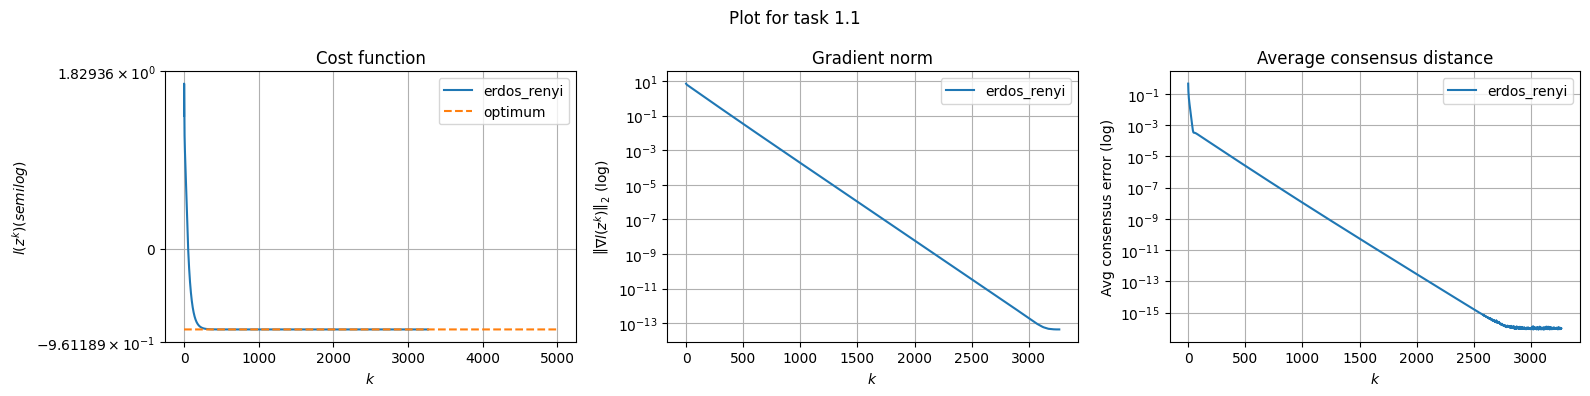

In [10]:
plt.figure(figsize=(16, 4))
plt.suptitle("Plot for task 1.1")

#Plot the cost function 
plt.subplot(1, 3, 1)
plot_cost_quadratic(local_loss, history_z, GRAPH_TYPE)
plt.plot([optimal_cost] * (NUM_ITERATIONS + 1), "--", label="optimum")
plt.title("Cost function")
plt.xlabel("$k$")
plt.ylabel("$l(z^k) (semilog)$")
plt.yscale("symlog")
plt.grid()
# plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.legend()

#Plot the gradient norm
plt.subplot(1, 3, 2)
plot_cost_gradient_norm(local_loss, history_z, GRAPH_TYPE)
plt.title("Gradient norm")
plt.xlabel("$k$")
plt.ylabel("$\\left\\Vert \\nabla l(z^k) \\right\\Vert_2$ (log)")
plt.legend()
plt.grid()
plt.yscale("log")

#Plot the average consensus 
plt.subplot(1, 3, 3)
plt.plot([get_average_consensus_error(z) for z in history_z], label=GRAPH_TYPE)
plt.title("Average consensus distance")
plt.xlabel("$k$")
plt.ylabel("Avg consensus error (log)")
plt.yscale("log")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
